In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
import warnings

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\train.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\test.csv")

In [3]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:

#Using lambda funstion for dependents
def impute_dep(cols):
    Dependents = cols[0]
    Married = cols[1]
    
    if pd.isnull(Dependents):

        if Married == "Yes":
            return 2

        elif Married == "No":
            return 0

        else:
            return 0

    else:
        if Dependents=="0":
            return 0
        elif Dependents=="1":
            return 1
        elif Dependents=="2":
            return 2
        elif Dependents=="3+":
            return 3
        else:
            return Dependents


        
        
        
 #Using lambda funstion
def impute_mar(cols):
    Married = cols[0]
    Dependents = cols[1]
    
    if pd.isnull(Married):

        if Dependents == 0:
            return "No"
        
        else:
            return "Yes"
        
    else:
        return Married

    
#Using lambda funstion
def impute_selfemp(cols):
    ApplicantIncome = cols[0]
    CoapplicantIncome = cols[1]
    Gender=cols[2]
    Self_Employed=cols[3]
        
    if pd.isnull(Self_Employed):

        if Gender == "Female":
            if CoapplicantIncome>0:
                return "No"
            elif ApplicantIncome >=15000:
                return "Yes"
            else:
                return "No"
            
        else:
            return "No"
 
    else:
        return Self_Employed


  
    
    

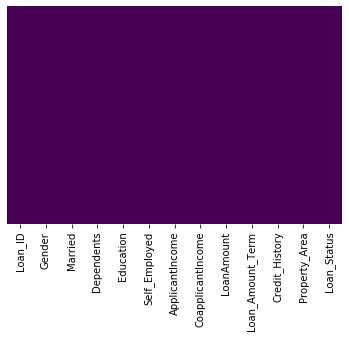

In [5]:
# Fixing the missing value problem

a=df1["LoanAmount"].median()
df1["LoanAmount"].replace({np.nan:a},inplace=True)

a=df1["Loan_Amount_Term"].median()
df1["Loan_Amount_Term"].replace({np.nan:a},inplace=True)

df1['Dependents'] = df1[['Dependents','Married']].apply(impute_dep,axis=1)

df1['Married'] = df1[['Married','Dependents']].apply(impute_mar,axis=1)

df1["Gender"].replace({np.nan:"Male"},inplace=True)#Feminist don't kill me

df1['Self_Employed'] = df1[['ApplicantIncome','CoapplicantIncome',"Gender","Self_Employed"]].apply(impute_selfemp,axis=1)
  
df1.Credit_History.replace({np.nan:1.0},inplace=True)

sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [6]:
#Categoral values to Numerical Values

df1.Married.replace({"Yes":1,"No":0},inplace=True)

df1.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)

df1.Self_Employed.replace({"Yes":1,"No":0},inplace=True)

df1.Property_Area.value_counts()

df1.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3},inplace=True)

df1.Loan_Status.replace({"Y":1,"N":0},inplace=True)

df1=df1.drop(["Loan_ID"],axis=1)

df1.Gender.replace({"Male":1,"Female":0},inplace=True)

In [7]:
target=df1["Loan_Status"]
df1=df1.drop(["Loan_Status"],axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df1,target,test_size=0.33,random_state=42)

In [9]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
accuracy_score(y_test,y_pred)

0.7980295566502463

In [10]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_score(y_test,y_pred)

0.645320197044335

In [11]:
#accuracy score
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_score(y_test,y_pred)

0.6009852216748769

In [12]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
accuracy_score(y_test,y_pred)


0.7931034482758621

In [13]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy_score(y_test,y_pred)

0.6600985221674877

In [14]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\SaurabhM\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5123152709359606

In [15]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test,y_pred)


0.5517241379310345

In [16]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.6995073891625616

In [17]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.7832512315270936

In [18]:
#XGBoost Classifier
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 80.79
Time consumed for training: 0.075
Time consumed for prediction: 0.00424 seconds


In [19]:
#KNeighbor Classifier
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 56.65
Time consumed for training: 0.003 seconds
Time consumed for prediction: 0.02161 seconds


In [20]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 74.88
Time consumed for training: 0.044 seconds
Time consumed for prediction: 0.01094 seconds


In [21]:
#Support Vector Machine Classifier
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 64.53
Time consumed for training: 0.044 seconds
Time consumed for prediction: 0.00993 seconds


In [22]:
results = pd.DataFrame({
    'Model': ['KNN', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn,acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,80.788177,0.074892,0.004241
Random Forest,74.876847,0.043609,0.010939
SVC,64.532020,0.044066,0.009933
KNN,56.650246,0.002969,0.021614


In [23]:
#Cross Validation
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78571429 0.80487805 0.80487805 0.82926829 0.7804878  0.73170732
 0.75609756 0.90243902 0.80487805 0.80487805]
Mean: 0.8005226480836237
Standard Deviation: 0.04314969129529141


In [24]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76190476 0.85365854 0.80487805 0.80487805 0.80487805 0.70731707
 0.75609756 0.87804878 0.7804878  0.73170732]
Mean: 0.7883855981416957
Standard Deviation: 0.04970584070494479


In [25]:
xgboost = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=500, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 79.31


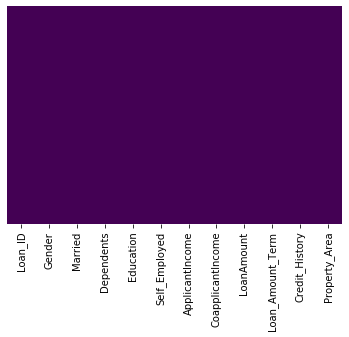

In [26]:
#Prediciton Time

# Fixing the missing value problem

a=df2["LoanAmount"].median()
df2["LoanAmount"].replace({np.nan:a},inplace=True)

a=df2["Loan_Amount_Term"].median()
df2["Loan_Amount_Term"].replace({np.nan:a},inplace=True)

df2['Dependents'] = df2[['Dependents','Married']].apply(impute_dep,axis=1)

df2['Married'] = df2[['Married','Dependents']].apply(impute_mar,axis=1)

df2["Gender"].replace({np.nan:"Male"},inplace=True)#Feminist don't kill me

df2['Self_Employed'] = df2[['ApplicantIncome','CoapplicantIncome',"Gender","Self_Employed"]].apply(impute_selfemp,axis=1)
  
df2.Credit_History.replace({np.nan:1.0},inplace=True)

sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
#Categoral values to Numerical Values

df2.Gender.replace({"Male":1,"Female":0},inplace=True)

df2.Married.replace({"Yes":1,"No":0},inplace=True)

df2.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)

df2.Self_Employed.replace({"Yes":1,"No":0},inplace=True)

df2.Property_Area.value_counts()

df2.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3},inplace=True)

#df2.Loan_Status.replace({"Y":1,"N":0},inplace=True)
ids=df2["Loan_ID"]

df2=df2.drop(["Loan_ID"],axis=1)



In [28]:
preds = xgb.predict(df2)

In [29]:
pred=[]
for items in preds:
    if items==1:
        pred.append("Y")
    else:
        pred.append("N")

In [30]:
submission = pd.DataFrame({'Loan_ID': ids,
                           'Loan_Status':pred
                           })

In [31]:
submission.to_csv(r"C:\Users\SaurabhM\Desktop\data2\submit_1.csv",index=False)